# Importation Bibliothèques

In [2]:
import gymnasium as gym
import bbrl_gymnasium
from moviepy.editor import ipython_display as video_display
from RewardWrapper import RewardWrapper
from PrioritizedReplayAgent import PrioritizedReplayAgent
import matplotlib.pyplot as plt

from LargestFirst import LargestFirst
from RandomDyna import RandomDyna
from FocusedDyna import FocusedDyna

from maze import setup_env_9x6, setup_env_18x12, setup_env_36x24

import pandas as pd
import numpy as np

from omegaconf import OmegaConf
# Load YAML config file as DictConfig
config = OmegaConf.load("config.yaml")

# Paramètres

In [3]:
epsilon = config.main.epsilon  # parametres pour gerer l'exploration dans epsilon-greedy
delta = config.main.delta  #treshold
gamma = 0.95  #discount factor
alpha = config.main.alpha   #learning rate
max_step = config.main.max_step #nombre de pas maximum pour un episode

# Définition des labyrinthes

In [4]:
# environnement 9x6 
env_9x6 = gym.make("MazeMDP-v0", kwargs={"width": 9, "height": 6,
"start_states": [2], "walls": [13, 14, 15, 34, 42, 43, 44],
"terminal_states": [41]}, render_mode="rgb_array", gamma=gamma)

env_9x6.metadata['render_fps'] = 1
env_9x6 = RewardWrapper(env_9x6)
env_9x6.reset()

env_9x6.set_no_agent()
env_9x6.init_draw("The maze 9x6")

# environnement 18x12
env_18x12 = gym.make("MazeMDP-v0", kwargs={"width": 18, "height": 12,
"start_states": [4], "walls": [50,51,52,53,54,62,63,64,65,66, 128,129,140,141,168,169,170,171,172,173,180,181,182,183,184,185],
"terminal_states": [166,167,178,179]}, render_mode="rgb_array", gamma=gamma)

env_18x12.metadata['render_fps'] = 1
env_18x12 = RewardWrapper(env_18x12)
env_18x12.reset()

env_18x12.set_no_agent()
env_18x12.init_draw("The maze 18x12")


Output()

Output()

# Largest First Dyna

### Queue Dyna Priority Based on Prediction Difference Magnitude

In [4]:
QueueDyna = LargestFirst(env_9x6, alpha, delta, epsilon,max_step, render = False, episode= 100)
QueueDyna.execute()


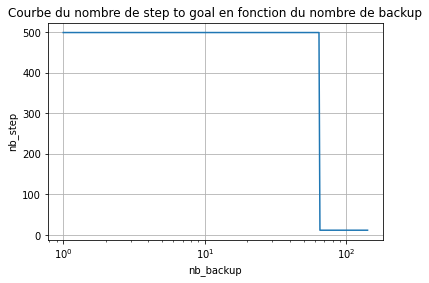

In [5]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)


plt.title('Courbe du nombre de step to goal en fonction du nombre de backup')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()

# Random Dyna

In [6]:
RDyna = RandomDyna(env_9x6, alpha, delta, epsilon, max_step, render = False, episode= 100)
RDyna.execute()

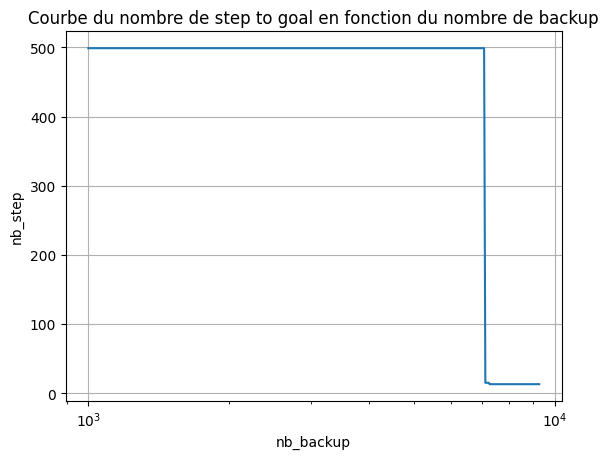

In [7]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)

plt.title('Courbe du nombre de step to goal en fonction du nombre de backup')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()


# Focused Dyna

In [9]:
FDyna = FocusedDyna(env_9x6, alpha, delta, epsilon,max_step, render = False, episode= 100)
FDyna.execute()


0
1
7
7
1
0
1
7
1
0
1
0
0
0
0
6
7
6
6
7
1
2
1
7
1
1
1
2
8
2
3
2
1
2
2
8
9
3
3
3
3
3
4
10
4
5
5
5
5
4
10
4
10
11
14
14
14
20
19
13
13
10
11
10
11
11
14
11
5
4
4
4
5
11
5
4
4
5
5
4
4
10
11
10
11
11
5
5
5
11
5
4
4
4
10
13
10
11
5
4
4
5
11
11
10
11
11
10
11
10
4
3
2
3
9
9
8
2
8
8
7
8
7
7
1
0
0
6
12
6
12
12
6
12
6
12
6
12
12
15
15
21
27
32
33
34
33
32
32
32
32
27
28
27
27
32
32
33
33
34
34
33
28
33
32
32
33
34
35
34
34
34
34
33
28
27
27
21
27
32
27
28
22
28
22
28
22
16
16
15
15
12
12
6
7
7
1
1
1
1
2
2
1
1
2
3
4
3
9
10
13
19
25
24
23
22
23
22
23
24
30
30
30
24
18
24
18
24
23
17
18
18
24
23
17
17
16
15
12
12
15
21
22
28
29
30
24
25
26
25
25
25
19
20
20
19
20
14
20
14
14
14
14
13
10
13
19
20
26
31
37
36
39
45
46
0
0
1
2
3
9
8
2
8
9
3
9
8
8
2
8
8
7
7
1
1
7
1
1
7
1
0
0
0
0
1
2
1
1
0
6
6
12
15
15
16
16
17
16
22
23
24
25
25
25
25
24
23
29
23
29
23
17
18
24
18
17
18
19
25
25
24
18
17
16
16
22
23
22
28
29
28
22
28
27
27
27
28
22
28
29
23
29
30
30
29
23
22
23
22
23
22
21
15
12
6
7
1
2
2
3
3
3
3
4
4
4

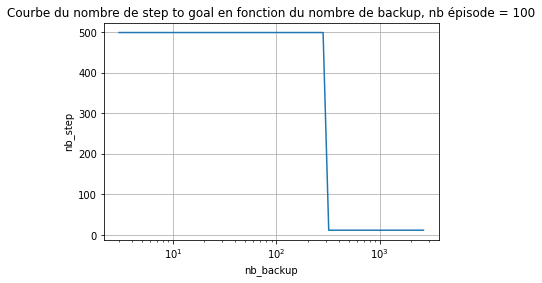

In [10]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)


plt.title(f'Courbe du nombre de step to goal en fonction du nombre de backup, nb épisode = {FDyna.episode}')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()

# Test SR

In [5]:
from SuccessorRepresentationFD import SuccessorRepresentationFD

## Small labyrinth

In [7]:
fdsr = SuccessorRepresentationFD(env_9x6, alpha,delta, epsilon, config.sr.nb_episode,config.main.max_step, config.sr.env9x6.train_episode_length, config.sr.env9x6.test_episode_length)

In [8]:
fdsr.stepsFromStart

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 1,
 7: 2,
 8: 3,
 9: 4,
 10: 5,
 11: 6,
 12: 2,
 13: 6,
 14: 7,
 15: 3,
 16: 4,
 17: 5,
 18: 6,
 19: 7,
 20: 8,
 21: 4,
 22: 5,
 23: 6,
 24: 7,
 25: 9,
 26: 9,
 27: 5,
 28: 6,
 29: 7,
 30: 9,
 31: 10,
 32: 6,
 33: 7,
 34: 8,
 35: 9,
 36: 10,
 37: 12,
 38: 10,
 39: 12,
 40: 14,
 41: 15,
 42: 13,
 43: 14,
 44: 13,
 45: 14,
 46: 15}

In [11]:
fdsr.execute()

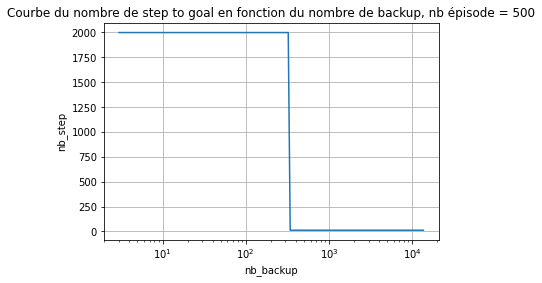

In [12]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)


plt.title(f'Courbe du nombre de step to goal en fonction du nombre de backup, nb épisode = {fdsr.episode}')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()

In [5]:
fdsr = SuccessorRepresentationFD(env_18x12, alpha,delta, epsilon, config.sr.nb_episode,config.main.max_step, config.sr.env18x12.train_episode_length, config.sr.env18x12.test_episode_length)

KeyboardInterrupt: 

: 

In [ ]:
fdsr.stepsFromStart

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 10,
 9: 9,
 10: 10,
 11: 15,
 12: 1,
 13: 2,
 14: 3,
 15: 4,
 16: 5,
 17: 6,
 18: 7,
 19: 8,
 20: 10,
 21: 11,
 22: 12,
 23: 12,
 24: 2,
 25: 3,
 26: 4,
 27: 5,
 28: 6,
 29: 7,
 30: 8,
 31: 9,
 32: 12,
 33: 11,
 34: 14,
 35: 13,
 36: 3,
 37: 4,
 38: 5,
 39: 6,
 40: 7,
 41: 8,
 42: 9,
 43: 10,
 44: 11,
 45: 12,
 46: 13,
 47: 14,
 48: 4,
 49: 5,
 50: 13,
 51: 12,
 52: 14,
 53: 14,
 54: 16,
 55: 5,
 56: 6,
 57: 14,
 58: 14,
 59: 16,
 60: 18,
 61: 16,
 62: 6,
 63: 7,
 64: 8,
 65: 10,
 66: 10,
 67: 11,
 68: 15,
 69: 15,
 70: 18,
 71: 15,
 72: 18,
 73: 22,
 74: 7,
 75: 8,
 76: 9,
 77: 11,
 78: 11,
 79: 12,
 80: 14,
 81: 16,
 82: 15,
 83: 19,
 84: 18,
 85: 20,
 86: 9,
 87: 10,
 88: 11,
 89: 12,
 90: 13,
 91: 13,
 92: 16,
 93: 19,
 94: 17,
 95: 21,
 96: 18,
 97: 23,
 98: 11,
 99: 10,
 100: 12,
 101: 12,
 102: 15,
 103: 16,
 104: 18,
 105: 18,
 106: 18,
 107: 20,
 108: 23,
 109: 28,
 110: 12,
 111: 11,
 112: 13,
 113: 13,
 114: 15,
 11

In [30]:
fdsr.execute()

0
1
0
12
12
24
24
36
37
36
48
55
62
55
62
74
86
87
88
100
112
122
132
133
134
135
125
126
127
137
138
138
150
138
150
151
152
158
164
158
159
159
165
177
189
189
189
189
189
177
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
177
189
189
189
177
176
177
189
189
189
189
189
189
189
189
189
189
177
189
188
176
164
165
177
189
189
189
189
189
189
177
189
189
189
189
188
189
188
189
189
189
189
189
189
189
188
189
189
177
189
188
189
177
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
189
177
189
177
189
189
189
189
189
189
188
189
189
189
188
189
189
189
189
189
189
189
189
188
189
189
189
188
189
189
189
189
177
189
188
189
189
189
189
189
189
189
189
189
189
189
189
189
177
189
189
189
189
189
189
177
189
177
189
189
188
187
187
188
189
177
189
189
188
176
188
188
189
189
189
189
189
189
189
188
189
177
189
189
189
189
177
189
177
189
189
177
165
177
176
188
188
189
189
189
189
189
189
189
18

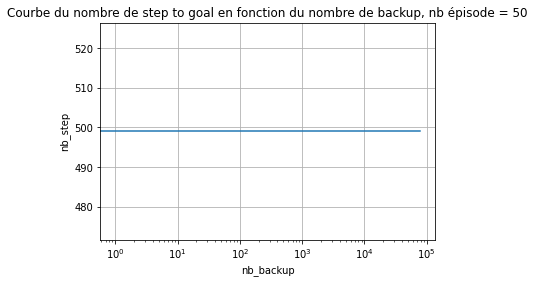

In [31]:
data = pd.read_csv("executionInformation.csv")

nb_steps = data.iloc[:, 1].tolist()
nb_backup = data.iloc[:,0].tolist()

plt.plot(nb_backup,nb_steps)


plt.title(f'Courbe du nombre de step to goal en fonction du nombre de backup, nb épisode = {fdsr.episode}')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.grid(True)
plt.show()

# Figure 8

In [9]:
def moyenne_par_indice(liste):
    tableau = np.array(liste)
    moyennes = np.mean(tableau, axis=0)
    moyennes = np.where(np.isnan(moyennes), None, moyennes)
    return moyennes.tolist()

In [16]:

from scipy.interpolate import interp1d

all_steps_lg = []
all_backups_lg = []

all_steps_rd = []
all_backups_rd = []

all_steps_dfd = []
all_backups_dfd = []

all_steps_dfd = []
all_backups_dfd = []

all_steps_sr = []
all_backups_sr = []
nb_exec = 2
for i in range(nb_exec):
    QueueDyna = LargestFirst(env_18x12, alpha, delta, epsilon,max_step, render = False, episode= 500)
    QueueDyna.execute()
    print(i)
    data = pd.read_csv("executionInformation.csv")

    nb_steps = data.iloc[:, 1].tolist()
    nb_backup = data.iloc[:,0].tolist()
    all_steps_lg.append(nb_steps[:-2])
    all_backups_lg.append(nb_backup[:-2])

    RDyna = RandomDyna(env_18x12, alpha, delta, epsilon,max_step, render = False, episode= 500)
    RDyna.execute()
    print(i)
    data = pd.read_csv("executionInformation.csv")
    nb_steps =data.iloc[:, 1].tolist()
    nb_backup =data.iloc[:,0].tolist()
    all_steps_rd.append(nb_steps)
    all_backups_rd.append(nb_backup)

    """FDyna = FocusedDyna(env_18x12, alpha, delta, epsilon,max_step, render = False, episode= 500)
    FDyna.execute()
    data = pd.read_csv("executionInformation.csv")
    print(i)
    nb_steps = data.iloc[:, 1].tolist()
    nb_backup = data.iloc[:,0].tolist()
    all_steps_dfd.append(nb_steps)
    all_backups_dfd.append(nb_backup)"""


    
    fdsr.execute()
    data = pd.read_csv("executionInformation.csv")
    print(i)
    nb_steps = data.iloc[:, 1].tolist()
    nb_backup = data.iloc[:,0].tolist()
    all_steps_sr.append(nb_steps)
    all_backups_sr.append(nb_backup)

    




0
0
0
1
1
1


In [19]:
np.array(all_steps_sr)

array([[1999, 1999, 1999, ...,   12,   12,   12],
       [1999, 1999, 1999, ...,   12,   12,   12]])

: 

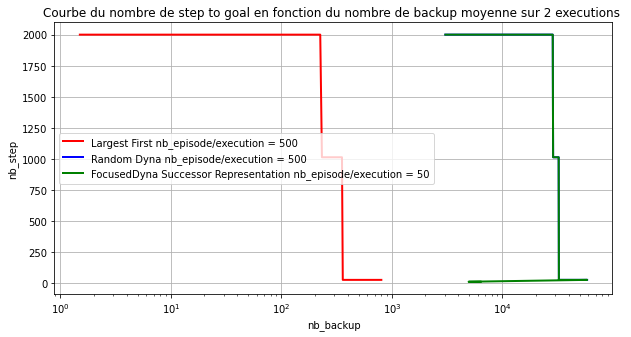

In [17]:
plt.figure(figsize=(10,5))
plt.plot(moyenne_par_indice(all_backups_lg), moyenne_par_indice(all_steps_lg), color='red', linewidth=2, label = f"Largest First nb_episode/execution = {QueueDyna.episode}")

plt.plot(moyenne_par_indice(all_backups_rd), moyenne_par_indice(all_steps_rd) ,color='blue', linewidth=2, label = f"Random Dyna nb_episode/execution = {RDyna.episode}")

"""plt.plot(moyenne_par_indice(all_backups_dfd), moyenne_par_indice(all_steps_dfd), color='green', linewidth=2, label = f"FocusedDyna nb_episode/execution = {FDyna.episode}")
"""

plt.plot(moyenne_par_indice(all_backups_sr), moyenne_par_indice(all_steps_sr), color='green', linewidth=2, label = f"FocusedDyna Successor Representation nb_episode/execution = {fdsr.episode}")



plt.title(f'Courbe du nombre de step to goal en fonction du nombre de backup moyenne sur {nb_exec} executions ')
plt.xlabel('nb_backup')
plt.ylabel('nb_step')
plt.xscale('log')
plt.legend(loc='best')
plt.grid(True)
plt.show()
